In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)

In [70]:
df['job_posted_month'] =df['job_posted_date'].dt.strftime('%B')

In [71]:
# Create a new data frame with job postings in Vietnam
df_vietnam = df[df['job_country']== 'Vietnam']

In [72]:
# Identify top 3 jobs
top_3_jobs = df_vietnam.job_title_short.value_counts().head(3).index

In [46]:
top_3_jobs

Index(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype='object', name='job_title_short')

In [24]:
top_3_jobs_vietnam =top_3_jobs.to_list()
type(top_3_jobs_vietnam)
top_3_jobs_vietnam

['Data Engineer', 'Data Scientist', 'Data Analyst']

In [73]:
df_jobs_month_vietnam = df_vietnam.pivot_table( index= 'job_posted_month', columns= 'job_title_short', aggfunc='size')

In [75]:
df_jobs_month_vietnam = df_jobs_month_vietnam[top_3_jobs_vietnam]
df_jobs_month_vietnam

job_title_short,Data Engineer,Data Scientist,Data Analyst
job_posted_month,,,
April,58.0,25.0,22.0
August,61.0,29.0,12.0
December,71.0,26.0,26.0
February,33.0,25.0,25.0
January,61.0,33.0,43.0
July,52.0,19.0,24.0
June,60.0,16.0,24.0
March,44.0,25.0,26.0
May,38.0,19.0,17.0


### Sort data frame by month

In [111]:
# Resetting index:
df_jobs_month_vietnam.reset_index(inplace= True)

In [ ]:
df_jobs_month_vietnam

In [112]:
# Adding month_num column
df_jobs_month_vietnam['month_num'] = pd.to_datetime(df_jobs_month_vietnam['job_posted_month'], format='%B').dt.month

In [113]:
df_jobs_month_vietnam.set_index('job_posted_month', inplace=True)

In [115]:
df_jobs_month_vietnam=df_jobs_month_vietnam.sort_values('month_num')

In [116]:
df_jobs_month_vietnam.drop('month_num', axis = 1, inplace = True)

In [117]:
df_jobs_month_vietnam

job_title_short,Data Engineer,Data Scientist,Data Analyst
job_posted_month,,,
January,61.0,33.0,43.0
February,33.0,25.0,25.0
March,44.0,25.0,26.0
April,58.0,25.0,22.0
May,38.0,19.0,17.0
June,60.0,16.0,24.0
July,52.0,19.0,24.0
August,61.0,29.0,12.0
September,49.0,33.0,21.0


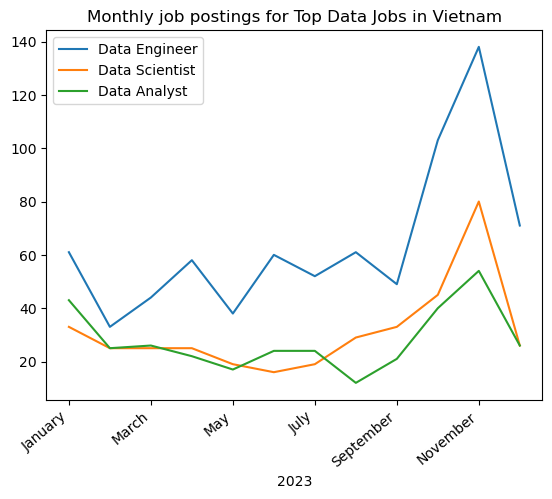

In [119]:
df_jobs_month_vietnam.plot(kind='line')
plt.title('Monthly job postings for Top Data Jobs in Vietnam')
plt.xlabel(2023)
plt.legend()
plt.xticks(rotation = 40, ha ='right')
plt.show()